# CC 11 (Quantum Mechanics) All Codes

> **Eigenvlaue Problems**

> **Central Difference Method** (Central potential, Potential well: infinite and finite, triangular potential, Radial equation: H-atom)

> **Numerov Method** (Infinite potential well, Linear Harmonic Oscillator, LHO with perturbation)

> **Exam Questions - 2023** (The questions are solved using Central difference method. Solution of all the 5 questions are given here.)


# Eigenvalue Problems

In [1]:
from IPython.display import Image

The solution of eigenvalue problems numerically is quite lengthy. In quantum mechanics and other branches of physics, there are lots of eigenvalue equations. Now, we can express eigenvalue equation by,
$$ \frac{d}{dx} \left( P(x)\frac{dy}{dx} \right) = Q(\lambda, x) y + R(x) $$
with known values $y(x_0)=y_0$ and $y(x_N)=y_N$. This is known as **Sturm-Liouville eigenvalue problems**. The above equation can be written as,
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
with known values $y(x_0)=y_0$ and $y(x_N)=y_N$. These conditions are followed by some specific values of $\lambda$. These values are known as eigenvalues. The eigenfunction corresponding to an eigenvalue contains specific number of nodes (where the function goes 0). All the eigenfunctions forms an orthonormal set. More specifically, if $\phi_n(x)$ is the eigenfunction associated with eigenvalue $\lambda_n$ ($n=1,2,3,...$), then it would contain $n-1$ number of nodes. The eigenvalues have a minimum value (say $\lambda_1$) but no specific maximum value. The orthonormal condition can be written as, $\left< \phi_m|\phi_n\right> = \delta_{m,n}$.

We can solve this eigenvalue problem by solving the following steps numerically -

1. We need to have the boundary values $y_0$ and $y_N$. Now, we need to assume the slope (\alpha) at the initial point. The magnitude of slope would be adjusted by numerical calculations but the sign of the slope is important. Now,
$$ \alpha = \frac{y_1-y_0}{h} \implies y_1 = y_0 +\alpha\, h $$
For positive slope, $y_1>y_0$ (graph will increase from initial point) and for negative slope, $y_1<y_0$ (graph will decrease from initial point).

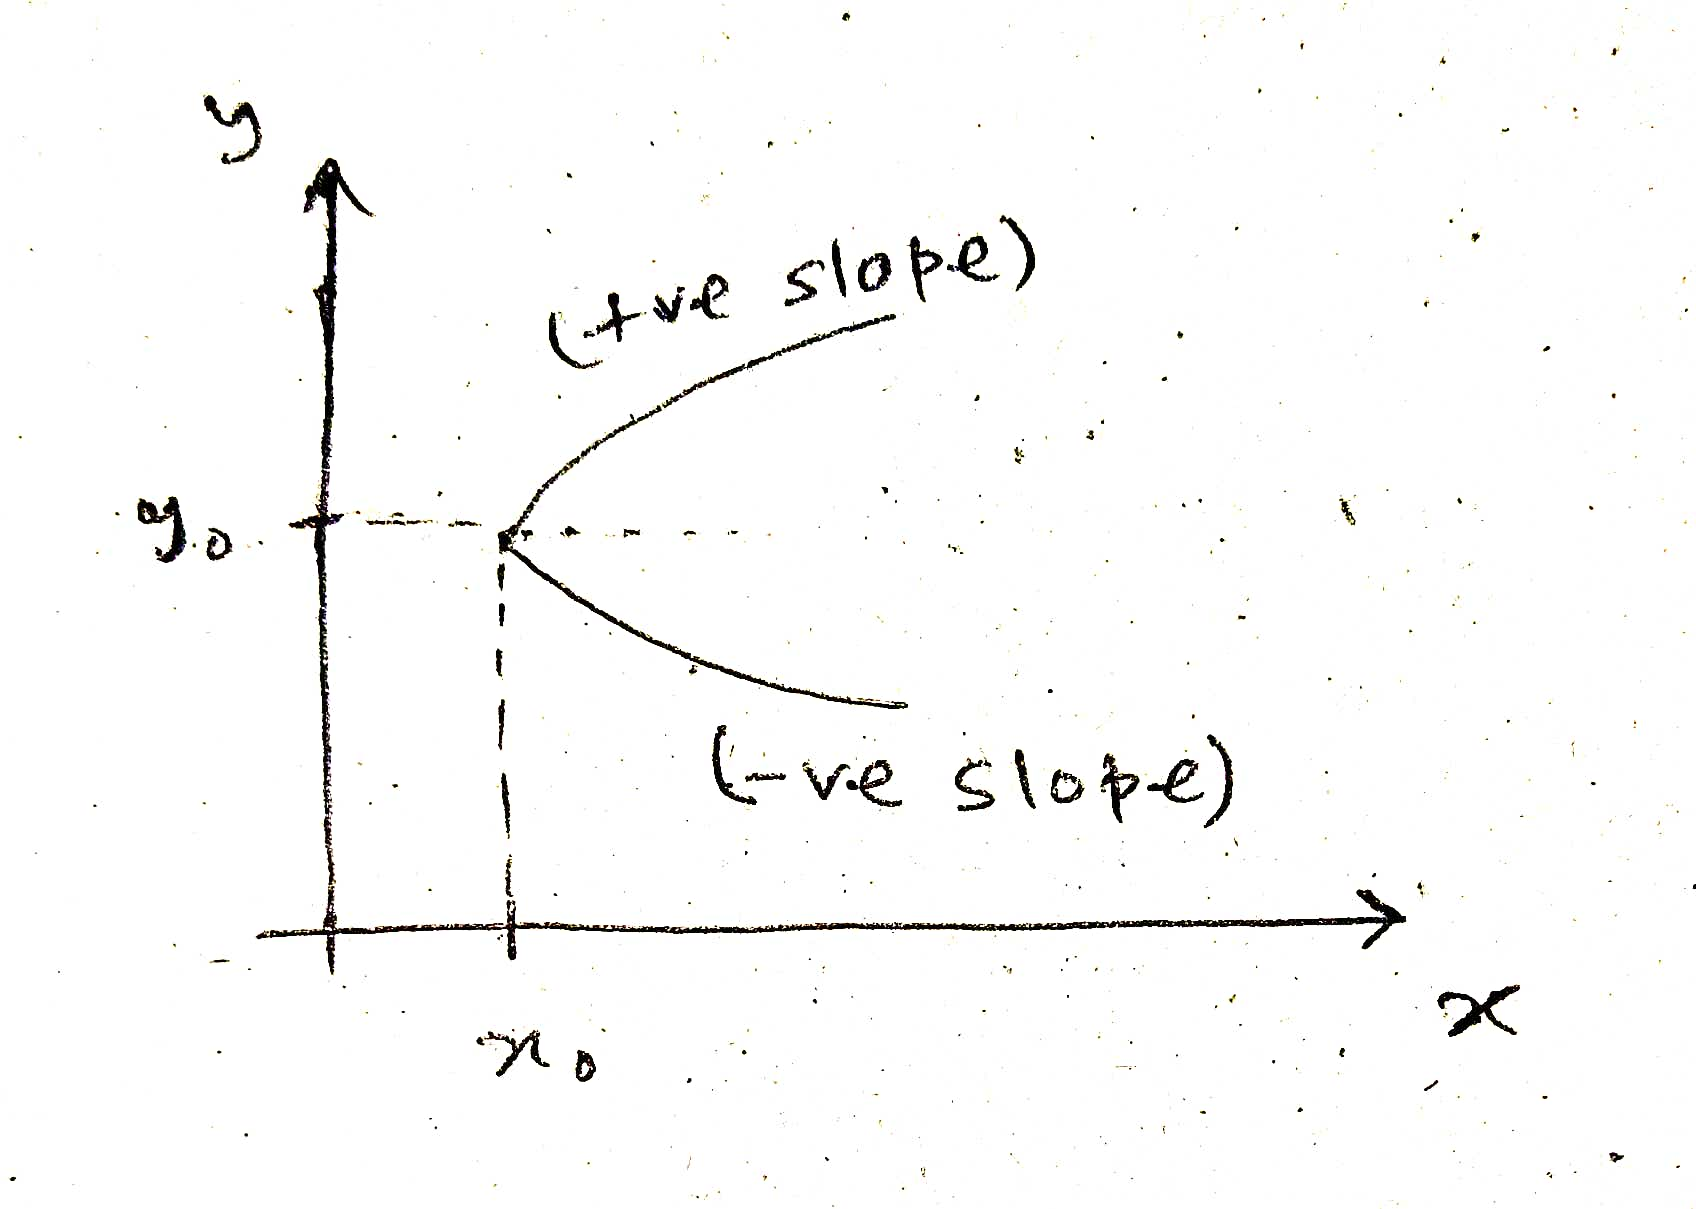

In [2]:
Image(filename='sem5_images/y1_sign.jpg')

2. An upper and a lower value is to be given for $\lambda$ and then by bisection method $\lambda$ will be chosen. For a certain $\lambda$, $y(x)$ can be calculated by central difference method. Now, that eigenvalue will correspond to some specific number of nodes. If nodes are counted in limit $(x_0,x_N)$ and matched with the needed number of nodes, we can go one step ahead towards the value of $\lambda$.

3. Now, for that obtained $\lambda$, the boundary condition $y(x_N)=y_N$ is to be matched. If it's not matched, $\lambda$ will be modified accordingly again by bisection method. Iterating this method we can get value of $\lambda_n$ and calculate corresponding eigenfunction $\phi_n(x)$ by central difference method.

4. Now, once an eigenfunction is obtained, we need to normalize it. For an eigenfunction $\phi(x)$, let, $\psi(x)=A\phi(x)$, where $A$ is the normalization constant. Now, the normalization condition is,
$$ \int_{-\infty}^{\infty} |\psi(x)|^2\, dx = 1$$
By this, $A$ can be calculated.

That's all we need to do to get eigenvalue $\lambda_n$ and corresponding normalized eigenfunction $\psi_n(x)$ from an eigenvalue problem.

## Time Independent Schrodinger Equation
One of the most important eigenvalue problems in physics is the time independent Schrodinger equation. The equation in 3D is,
$$ -\frac{\hbar^2}{2m} \nabla^2\psi(\vec{r}) + V(\vec{r})\psi(\vec{r}) = E\psi(\vec{r}) $$
In 1D,
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) $$

Here this equation is solved numerically by the following methods -
1. Central Difference Method and
2. Numerov Method.


# Central Difference Method

Here differential equation (or eigenvalue equation)
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
is solved numerically by central difference method.

The Taylor series expansion at some point $x=x_i$ is,
$$ y(x_{i}+h) = y(x_{i})+hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})+\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})+\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
Here, this can be written as,
$$ y(x_{i+1}) = y(x_{i})+hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})+\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})+\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
and,
$$ y(x_{i-1}) = y(x_{i})-hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})-\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})-\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$

By subtracting and adding these 2 relations we can get approximated finite difference formulae respectively:
$$ y'(x_i) = \frac{y(x_{i+1}) -y(x_{i-1})}{2h} $$
$$ y''(x_i) = \frac{y(x_{i+1}) +y(x_{i-1}) -2y(x_i)}{h^2} $$

Now, we have the differential equation,
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
For a known $\lambda$, we can write $q(\lambda, x)=q(x)$.

Applying the finite difference formulae here,
$$ \frac{y(x_{i+1}) +y(x_{i-1}) -2y(x_i)}{h^2} -p(x_i) \left(\frac{y(x_{i+1}) -y(x_{i-1})}{2h} \right) -q(x_i)y(x_i) -r(x_i) = 0 $$

$$ \implies (y(x_{i+1}) +y(x_{i-1}) -2y(x_i)) - \frac{1}{2} p(x_i) h(y(x_{i+1}) \\
-y(x_{i-1})) -h^2(q(x_i)y(x_i) -r(x_i)) = 0 $$
$$ \implies y(x_{i+1})\left(1 -\frac{h}{2} p(x_i) \right) + y(x_i)\left(-2 -h^2q(x_i) \right) \\
+y(x_{i-1})\left(1 +\frac{h}{2}p(x_i) \right) + \left(h^2r(x_i) \right) = 0 $$

Applying the transformation $i \rightarrow i-1$ we will obtain,
$$ \implies y(x_{i})\left(1 -\frac{h}{2} p(x_{i-1}) \right) + y(x_{i-1})\left(-2 -h^2q(x_{i-1}) \right) \\
+y(x_{i-2})\left(1 +\frac{h}{2}p(x_{i-1}) \right) + \left(h^2r(x_{i-1}) \right) = 0 $$

So,
$$ y(x_i) = \frac{a}{d} \,y(x_{i-1}) + \frac{b}{d}\, y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2 + h^2 q(\lambda, x_{i-1}) $$
$$ b = -\left(1 + \frac{h}{2}\, p(x_{i-1}) \right) $$
$$ c = h^2 r(x_{i-1}) $$
$$ d = 1 - \frac{h}{2}\, p(x_{i-1}) $$

## Numerical solution by Central Difference method

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Propagator with central difference calculation
Function: **`prop_central_diff(pr, p, q, r, x, y, dx)`**

**Algorithm:**

1. Define $p(x),q(\lambda,x),r(x)$.
2. x array and y array
3. h = dx = x[1] - x[0]
4. N = len(x)
5. Write $a,b,c,d$ and $y_i$ for i in range(N).

$$ y(x_i) = \frac{a}{d} \,y(x_{i-1}) + \frac{b}{d}\, y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2 + h^2 q(\lambda, x_{i-1}) $$
$$ b = -\left(1 + \frac{h}{2}\, p(x_{i-1}) \right) $$
$$ c = h^2 r(x_{i-1}) $$
$$ d = 1 - \frac{h}{2}\, p(x_{i-1}) $$

In [4]:
def prop_central_diff(pr, p, q, r, x, y, dx):
    '''
    y'' + py' + qy + r = 0
    p = p(x), q = q(lb, x), r = r(x)
    '''
    N = len(x)
    yy = [y[i] for i in range(N)]
    for i in range(2, N):
        a = 2 + dx**2 *q(pr, x[i-1])
        b = -(1 + dx/2 *p(x[i-1]))
        c = dx**2 *r(x[i-1])
        d = 1 - dx/2 *p(x[i-1])
        yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
    return yy

### Normalization

In [5]:
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

### Determination of eigenvalue and eigenfunction
Function: **`center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr)`**

In [6]:
def center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr):
    '''
    x0, y0 - left boundary condition
    xN, yN - right boundary condition
    y1 - estimation of solution at the next point after left boundary (y0)
    '''
    N = int((xN -x0)/dx)
    dx = (xN -x0)/N
    x = [x0 +i*dx for i in range(N+1)]
    y = [0 for i in range(N+1)]
    y[0], y[1], y[N] = y0, y1, yN
    itr = 0
    while abs(pr_max - pr_min) >  tol and itr < max_itr:
        pr = 0.5 *(pr_min + pr_max)  # bisection method
        yy = prop_central_diff(pr, p, q, r, x, y, dx)
        cnt = 0  # count
        for i in range(1, N-2):
            if yy[i]*yy[i+1] < 0:
                cnt += 1
        if cnt > nodes:
            pr_max = pr
        elif cnt < nodes:
            pr_min = pr
        else:
            if yy[N-1] > yN:
                pr_min = pr
            elif yy[N-1] < yN:
                pr_max = pr
            itr += 1
    if itr < max_itr:
        return pr, x, yy
    else:
        return None, None, None

## Schrodinger equation - Central Potential 
The time independent Schrodinger equation in 1D is,
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) $$

For central potential $V=V(r)$, the time independent (1D) Schrodinger will be reduced to,
$$ \frac{d^2\psi}{dr^2} = \frac{2m}{\hbar^2} \, (V(r)-E) \,\psi(r) $$

Now, comparing the above equation with our general differential equation,
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
we can notice,
$$ y(x) = \psi(r) $$
$$ p(x) = 0 $$
$$ q(\lambda, x) = -\frac{2m}{\hbar^2} (E-V(r)) $$
$$ r(x) = 0 $$

Consider the potential,
$$ V(r) = -\frac{e^2}{r} \, \exp(-r/a) $$

C:\Users\suman\AppData\Local\Temp\ipykernel_11328\2848319789.py:18: RuntimeWarning: overflow encountered in double_scalars
  if yy[i]*yy[i+1] < 0:


C:\Users\suman\AppData\Local\Temp\ipykernel_11328\2116218444.py:13: RuntimeWarning: overflow encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
C:\Users\suman\AppData\Local\Temp\ipykernel_11328\2116218444.py:13: RuntimeWarning: invalid value encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d


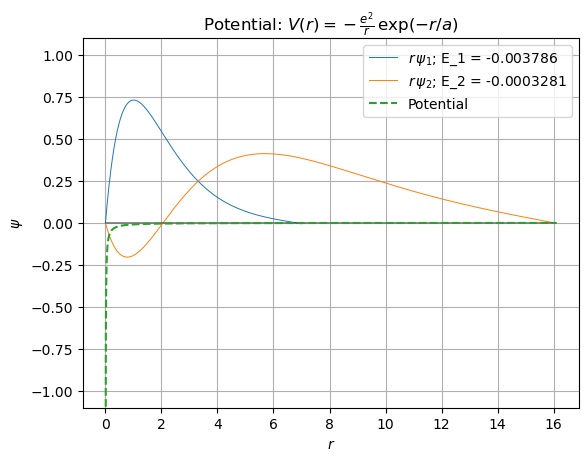

In [7]:
def V(e2, r):
    a = 7.5
    return  -e2/r * np.exp(-r/a)
hcut, m = 0.1, 1
e2 = 0.01
mh2 = 2*m/hcut**2
def p(r):
    return 0
def q(E, r):
    return -mh2 *(E - V(e2, r))
def rfn(r):
    return 0

dr = 0.005
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 1e-4, 0, [7.0,16.1], 0

for nodesn in range(2):
    Emn, Emx = V(e2, r0), V(e2, rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$\psi$')
plt.ylim(-1.1,1.1)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(e2, r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = -\\frac{e^2}{r} \, \exp(-r/a)$')
plt.grid()
plt.show()

## Potential Well

### Infinite Potential well

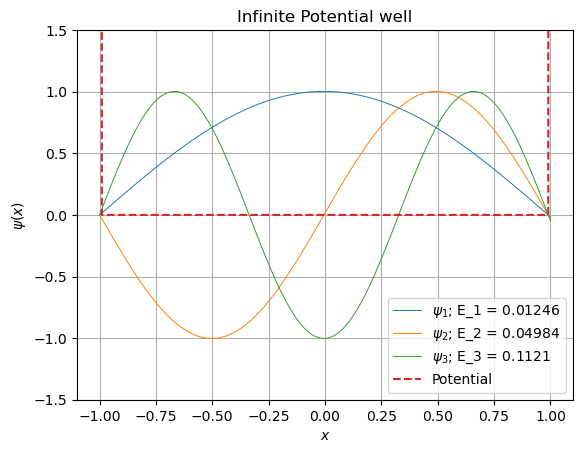

In [8]:
def V(x):
    l0, l1, V0 = -1, 1, 500
    if l0<x and x<l1:
        pot = 0
    else:
        pot = V0
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def p(x):
    return 0
def q(E, x):
    return -mh2 *(E - V(x))
def rfn(x):
    return 0

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = -1, 0, 1, 0

for nodesn in range(0,3):
    Emn, Emx = V(0), V(x0)
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, x, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    x0, psi0, xN, psiN, psi1, dx, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dx)
        x = np.array(x)
        plt.plot(x, psi, label=f'$\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.5)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Infinite Potential well')
plt.grid()
plt.show()

### Finite Potential well

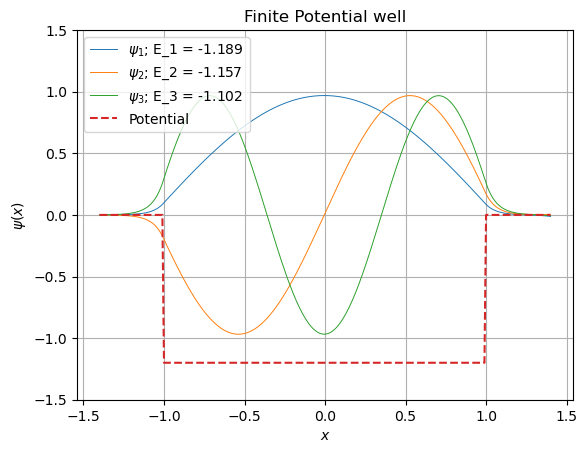

In [9]:
def V(x):
    l0, l1, V0 = -1, 1, -1.2
    if l0<x and x<l1:
        pot = V0
    else:
        pot = 0
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def p(x):
    return 0
def q(E, x):
    return -mh2 *(E - V(x))
def rfn(x):
    return 0

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = -1.4, 0, 1.4, 0

for nodesn in range(0,3):
    Emn, Emx = V(0), V(x0)
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, x, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    x0, psi0, xN, psiN, psi1, dx, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dx)
        x = np.array(x)
        plt.plot(x, psi, label=f'$\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.5)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Finite Potential well')
plt.grid()
plt.show()

### Triangular potential well

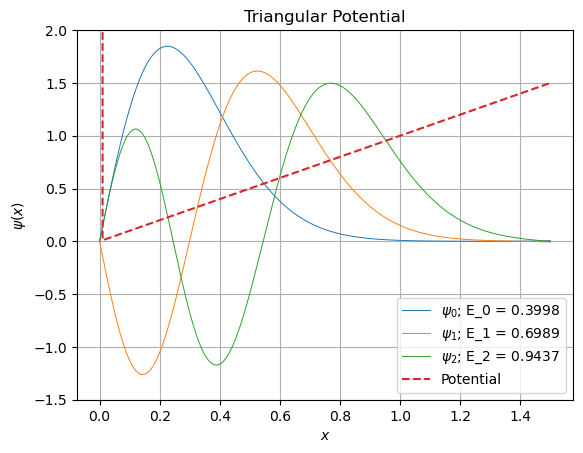

In [10]:
def V(x):
    a, V0 = 1, 2000
    if x <= 0:
        pot = V0
    else:
        pot = a*x
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def p(x):
    return 0
def q(E, x):
    return -mh2 *(E - V(x))
def rfn(x):
    return 0

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = 0, 0, 1.5, 0

for nodesn in range(0,3):
    Emn, Emx = -1, V(0)
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, x, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    x0, psi0, xN, psiN, psi1, dx, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dx)
        x = np.array(x)
        plt.plot(x, psi, label=f'$\psi_{nodesn}$; E_{nodesn} = {E:.4}',lw=0.7)

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,2)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Triangular Potential')
plt.grid()
plt.show()

## Radial equation
The radial equation is,
$$ \frac{d^2R}{dr^2} +\frac{2}{r} \frac{dR}{dr} + \frac{2m}{\hbar^2} (E-V(r)) R(r) = 0 $$

Now, comparing the above equation with our general differential equation,
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
we can notice,
$$ y(x) = R(r) $$
$$ p(x) = -\frac{2}{r} $$
$$ q(\lambda, x) = -\frac{2m}{\hbar^2} (E-V(r)) $$
$$ r(x) = 0 $$

### Radial part of Hydrogen atom problem
Here the potential is,
$$ V(r) = -\frac{e^2}{4\pi\epsilon_0 r} $$

C:\Users\suman\AppData\Local\Temp\ipykernel_11328\2848319789.py:18: RuntimeWarning: overflow encountered in double_scalars
  if yy[i]*yy[i+1] < 0:
C:\Users\suman\AppData\Local\Temp\ipykernel_11328\2116218444.py:13: RuntimeWarning: overflow encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
C:\Users\suman\AppData\Local\Temp\ipykernel_11328\2116218444.py:13: RuntimeWarning: invalid value encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d


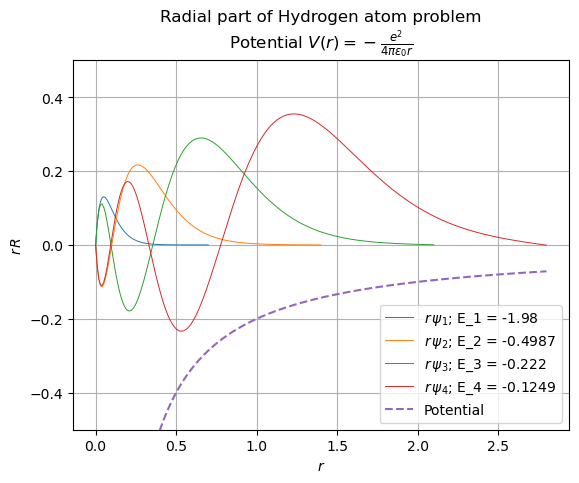

In [11]:
hcut, m, e2 = 0.1, 1, 0.2
mh2 = 2*m/hcut**2

def V(e2, r):
    return -e2/r
def p(r):
    return -2/r
def q(E, r):
    return -mh2 *(E - V(e2, r))
def rfn(r):
    return 0

dr = 1e-2
tol = 1e-6
mxitr = 1000
r0, psi0, rN, psiN = 1e-6, 0, np.arange(1,5)*0.7, 0

for nodesn in range(4):
    Emn, Emx = V(e2, r0), V(e2, rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        rpsi = r*psi
        plt.plot(r, rpsi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$r\,R$')
plt.ylim(-0.5,0.5)
plt.plot(r, V(e2,r), '--', label='Potential')
plt.legend()
plt.title('Radial part of Hydrogen atom problem\n'+
          'Potential $V(r) = -\\frac{e^2}{4\pi\epsilon_0 r}$')
plt.grid()
plt.show()

Now, consider
$$ V(r) = e^{-6r} -e^{-3r} $$

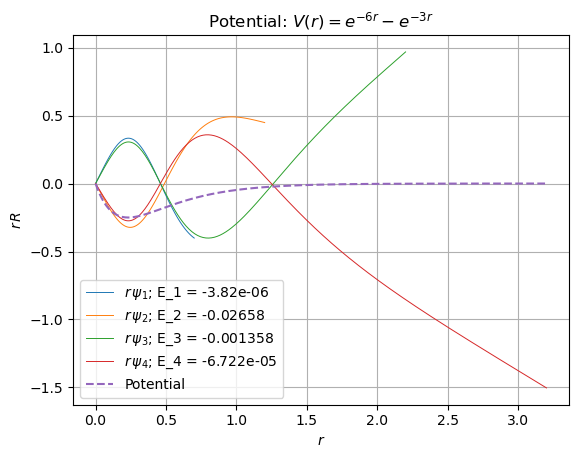

In [12]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2

def V(r):
    return np.exp(-6*r) -np.exp(-3*r)
def p(r):
    return -2/r
def q(E, r):
    return -mh2 *(E - V(r))
def rfn(r):
    return 0

dr = 1e-2
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 1e-6, 0, [0.7,1.2,2.2,3.2], 0

for nodesn in range(4):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        rpsi = r*psi
        plt.plot(r, rpsi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$r\,R$')
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = e^{-6r} -e^{-3r}$')
plt.grid()
plt.show()

Here the eigenvalues are dependent on the choice of boundary (i.e. $r_N$ here) and the eigenfunctions diverges at the boundary.

# Numerov Method

This method is used for *linear eigenvlaue problem*. The differential equation is, 
$$ \frac{d^2y}{dx^2} = q(\lambda, x) y(x) + r(x) $$
The Schrodinger equation is this kind of problem.

For this problem also, the specified boundary is $(x_0,y_0)$ and $(x_N,y_N)$ and some intermediate point is $(x_i,y_i)$ where $0<i<N$.

The Taylor series expansion at some point $x=x_i$ is,
$$ y(x_{i}+h) = y(x_{i})+hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})+\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})+\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
Here, this can be written as,
$$ y(x_{i+1}) = y(x_{i})+hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})+\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})+\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
and,
$$ y(x_{i-1}) = y(x_{i})-hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})-\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})-\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
By adding these 2 equations,
$$ y(x_{i+1})-2y(x_{i})+y(x_{i-1}) = h^{2}y_{i}^{\prime\prime} + 2\frac{h^{4}}{4!}y_{i}^{(4)}+O(h^{6}) $$
For the fourth order differentiation, we can do it by,
$$ y^{(4)}(x_{i}) = \frac{d^{2}}{dx^{2}}\left(\frac{d^{2}y}{dx^{2}}\right)_{x=x_{i}}=\frac{d^{2}}{dx^{2}}(q(\lambda,x)y(x)+r(x))_{x=x_{i}} $$

$$ \implies h^{2}y^{(4)}(x_{i}) = q(\lambda,x_{i+1})y(x_{i+1})-2q(\lambda,x_{i})y(x_{i})+ q(\lambda,x_{i-1})y(x_{i-1}) \\
+r(x_{i+1})-2r(x_{i})+r(x_{i-1})+O(h^{4}) $$
Replacing this in the previous equation,
$$ y(x_{i+1})-2y(x_i) + y(x_{i-1}) = h^2 \,[\,q(\lambda,x_i)y(x_i)+ r(x_i)] + \frac{h^2}{12} [q(\lambda, x_{i+1}) y(x_{i+1}) + r(x_{i+1}) \\
-2q(\lambda,x_{i})y(x_{i}) - 2r(x_i) +  q(\lambda,x_{i-1})y(x_{i-1}) + r(x_{i-1}) \,] + O(h^6) $$

$$ \implies y(x_{i+1})\left(1-\frac{h^{2}}{12}q(\lambda,x_{i+1})\right) - 2y(x_{i}) \left(1+\frac{5h^{2}}{12}q(\lambda,x_{i+1})\right) + y(x_{i-1}) \left(1-\frac{h^{2}}{12}q(\lambda,x_{i-1})\right) \\
= \frac{h^{2}}{12} \left(r(x_{i+1}) + 10r(x_i) + r(x_{i-1})\right) + O(h^6) $$

The reduced equation is (using the transformation $i\rightarrow i-1$) is,
$$ y(x_i) = \frac{a}{d} y(x_{i-1}) + \frac{b}{d} y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2\left(1 + \frac{5h^2}{12}q(\lambda, x_{i-1})\right) $$
$$ b = -\left(1 - \frac{h^2}{12}q(\lambda, x_{i-2})\right) $$
$$ c = \frac{h^2}{12}\left(r(x_i) + 10 \, r(x_{i-1}) + r(x_{i-2})\right) $$
$$ d = 1 - \frac{h^2}{12}q(\lambda, x_i) $$

## Numerical solution by Numerov Method

In [13]:
import numpy as np
import matplotlib.pyplot as plt

### Propagator with Numerov Method
Function: **`propNumerov`**

This function takes an eigenvalue as an input and returns the corresponding eigenfunction.

**Algorithm:**

1. Define functions $p(x)$ and $q(\lambda, x)$.
2. h = x[1] - x[0].
3. xi = x0 + ih for i in range(N).
4. Write relations for $a,b,c,d$ and $y_i$ for i in range(2,N).

In [14]:
def propNumerov(pr, q, r, x, y, dx):
    '''
    q = q(lambda, x), r = r(x)
    x - x array of propagation
    y - y array of propagation (a zero list generally)
    dx - increment along x axis
    yy - returned y array
    '''
    N = len(x)
    yy = [y[i] for i in range(N)]
    for i in range(2, N):
        a = 2*(1 + 5*dx**2/12 * q(pr, x[i-1]))
        b = -(1 - dx**2/12 * q(pr, x[i-2]))
        c = dx**2/12 * (r(x[0]) + 10*r(x[i-1]) + r(x[i-2]))
        d = 1 - dx**2/12 * q(pr, x[i])
        yy[i] = a/d * yy[i-1] + b/d * yy[i-2] + c/d
    return yy

### Solving the eigenvalue problem
Function: **`NumerovEigVal`**

Here, the steps mentioned in the **"Eigenvalue Problems"** section are applied.

In [15]:
def NumerovEigVal(prMin, prMax, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, mxItr):
    '''
    prMin, prMax - lower and upper limit of eigenvalue
    q = q(lambda, x), r = r(x)
    x0, y0 - left boundary conditions
    xN, yN - right boundary conditions
    y1 - next y value after y0
    dx - increment along x axis
    nodes - no. of nodes of eigenvalue
    tol - tolerance
    mxItr - maximum allowed iteration
    Return: pr, x, yy
        pr - eigenvalue
        x - x array of solution
        yy = y array of solution
    '''
    N = int((xN-x0)/dx)
    dx = (xN - x0)/N
    x = [x0 + i*dx for i in range(N+1)]
    y = [0 for i in range(N+1)]  # zero list
    y[0], y[1], y[N] = y0, y1, yN
    itr = 0
    # tol = 1e-6  # tolerance

    while abs(prMax-prMin) > tol and itr < mxItr:
        pr = 0.5*(prMin + prMax) # proceeding to bisection method
        yy = propNumerov(pr, q, r, x, y, dx)
        cnt = 0
        for i in range(1, N-2):
            if yy[i]*yy[i+1]<0:
                cnt += 1
        if cnt > nodes:
            prMax = pr
        elif cnt < nodes:
            prMin = pr
        else:
            if yy[N-1] > yN:
                prMin = pr
            elif yy[N-1] < yN:
                prMax = pr
        itr += 1
    if itr < mxItr:
        return pr, x, yy
    else:
        return None, None, None

### Normalization
Function: **`psiNorm(psi, dx)`**

In [16]:
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

In [17]:
print(f'propNumerov: {propNumerov.__doc__}')
print(f'\nNumerovEigVal: {NumerovEigVal.__doc__}')

propNumerov: 
    q = q(lambda, x), r = r(x)
    x - x array of propagation
    y - y array of propagation (a zero list generally)
    dx - increment along x axis
    yy - returned y array
    

NumerovEigVal: 
    prMin, prMax - lower and upper limit of eigenvalue
    q = q(lambda, x), r = r(x)
    x0, y0 - left boundary conditions
    xN, yN - right boundary conditions
    y1 - next y value after y0
    dx - increment along x axis
    nodes - no. of nodes of eigenvalue
    tol - tolerance
    mxItr - maximum allowed iteration
    Return: pr, x, yy
        pr - eigenvalue
        x - x array of solution
        yy = y array of solution
    


## Example (Numerov method)
Plot solution of the eigenvalue equation,
$$ \frac{d^2y}{dx^2} = -\lambda y(x) $$ 
with boundary conditions,
$\quad y(0) = 0 \quad$ and $\quad y(2\pi) = 0$.

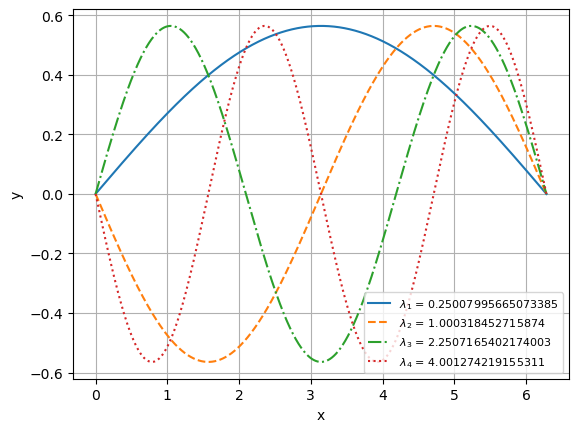

In [18]:
def q(lam, x):
    return -lam
def r(x):
    return 0

dx = 0.001
tol = 1e-6
mxitr = 100
lmin, lmax = 0.1, 30
x0, y0, xN, yN = 0, 0, 2*np.pi, 0

sty = ['-', '--', '-.', ':']
for nodes in range(4):
    y1 = (-1)**nodes*1e-4
    lam, x, y = NumerovEigVal(lmin, lmax, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, mxitr)
    y = psiNorm(y, dx)
    plt.plot(x, y, sty[nodes], label=f'$\lambda_{nodes+1}$ = {lam}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best', prop={'size':8})
plt.grid()
plt.show()

## Solution of Schrodinger equation by Numerov method
The time independent Schrodinger equation in 1D is,
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) $$

For central potential $V=V(r)$, the time independent (1D) Schrodinger will be reduced to,
$$ \frac{d^2\psi}{dr^2} = \frac{2m}{\hbar^2} \, (V(r)-E) \,\psi(r) $$

Now, comparing the above equation with our general differential equation,
$$ \frac{d^2y}{dx^2} = q(\lambda, x) y(x) + r(x) $$
we can notice,
$$ y(x) = \psi(r) $$
$$ q(\lambda, x) = -\frac{2m}{\hbar^2} (E-V(r)) $$
$$ r(x) = 0 $$

### Infinite potential well

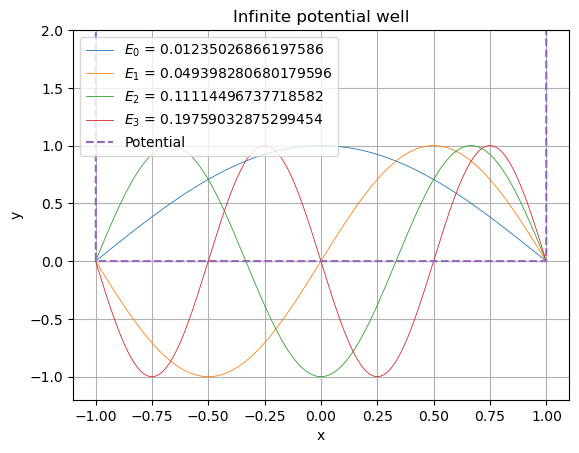

In [19]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def V(x):
    l0, l1, V0 = -1, 1, 500
    if l0<x and x<l1:
        pot = 0
    else:
        pot = V0
    return pot

def q(E, x):
    return -mh2*(E-V(x))
def r(x):
    return 0

dx = 0.001
tol = 1e-6
mxitr = 100
x0, xN = -1, 1
y0, yN = 0, 0
Emin, Emax = V(0), V(x0)

for nodesn in range(4):
    y1 = (-1)**nodesn*1e-4
    E, x, y = NumerovEigVal(Emin, Emax, q, r, x0, y0, xN, yN, 
                            y1, dx, nodesn, tol, mxitr)
    y = psiNorm(y, dx)
    plt.plot(x, y, label=f'$E_{nodesn}$ = {E}', lw=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.2,2)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Infinite potential well')
plt.grid()
plt.show()

### Linear Harmonic Oscillator
The potential (1D) is,
$$ V(x) = \frac{1}{2}kx^2 $$

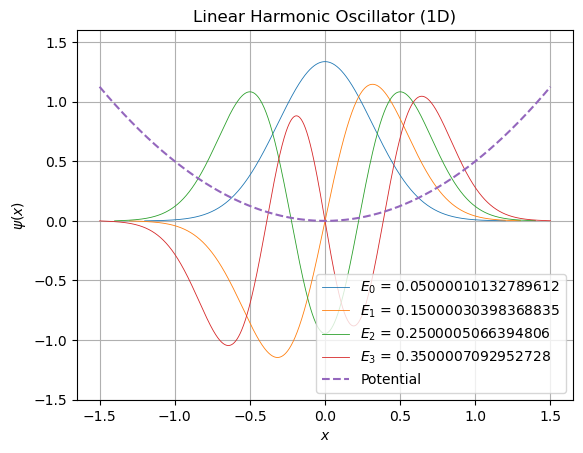

In [20]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def V(x):
    k = 1
    return (1/2)*k*x**2

def q(E, x):
    return -mh2*(E-V(x))
def r(x):
    return 0

dx = 0.001
tol = 1e-6
mxitr = 100
bnd = np.array([1.2, 1.3, 1.4, 1.5, 1.6, 1.7])
x0, xN = -bnd, bnd
y0, yN = 0, 0
Emin, Emax = 0, V(20)

for nodesn in range(4):
    y1 = (-1)**nodesn*1e-4
    E, x, y = NumerovEigVal(Emin, Emax, q, r, x0[nodesn], y0, xN[nodesn], yN, 
                            y1, dx, nodesn, tol, mxitr)
    y = psiNorm(y, dx)
    plt.plot(x, y, label=f'$E_{nodesn}$ = {E}', lw=0.6)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.6)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Linear Harmonic Oscillator (1D)')
plt.grid()
plt.show()

### Harmonic Oscillator with perturbation
Let the potential be,
$$ V(r) = \frac{1}{2}kr^2 + \frac{1}{3} br^3 $$
(This potential is actually originated from the interaction force, $F(r)=-kr-br^2$.)

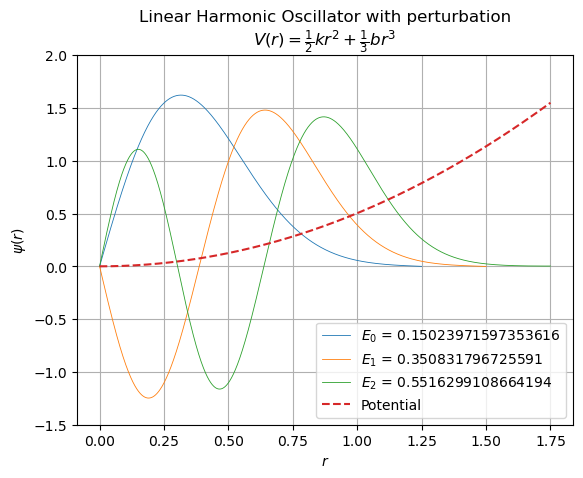

In [21]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def V(r):
    k, b = 1, 0.01
    return (1/2)*k*r**2 +(1/3)*b*r**3

def q(E, r):
    return -mh2*(E-V(r))
def rfn(r):
    return 0

dr = 0.001
tol = 1e-6
mxitr = 100
bnd = np.array([1.25, 1.5, 1.75, 2, 2.25, 2.5])
r0, rN = 0, bnd
y0, yN = 0, 0
Emin, Emax = 0, V(20)

for nodesn in range(3):
    y1 = (-1)**nodesn*1e-4
    E, r, y = NumerovEigVal(Emin, Emax, q, rfn, r0, y0, rN[nodesn], yN, 
                            y1, dr, nodesn, tol, mxitr)
    y = psiNorm(y, dr)
    plt.plot(r, y, label=f'$E_{nodesn}$ = {E}', lw=0.6)
plt.xlabel('$r$')
plt.ylabel('$\psi(r)$')
plt.ylim(-1.5,2)
Vr = [V(i) for i in r]
plt.plot(r, Vr, '--', label='Potential')
plt.legend(loc='best')
plt.title('Linear Harmonic Oscillator with perturbation\n'+
          '$ V(r) = \\frac{1}{2}kr^2 + \\frac{1}{3} br^3 $')
plt.grid()
plt.show()

# CC 11 (Quantum Mechanics) Practical Exam - 2023

## Numerical solution by Central Difference method

In [22]:
import numpy as np
import matplotlib.pyplot as plt

### Propagator with central difference calculation
Function: **`prop_central_diff(pr, p, q, r, x, y, dx)`**

**Algorithm:**

1. Define $p(x),q(\lambda,x),r(x)$.
2. x array and y array
3. h = dx = x[1] - x[0]
4. N = len(x)
5. Write $a,b,c,d$ and $y_i$ for i in range(N).

$$ y(x_i) = \frac{a}{d} \,y(x_{i-1}) + \frac{b}{d}\, y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2 + h^2 q(\lambda, x_{i-1}) $$
$$ b = -\left(1 + \frac{h}{2}\, p(x_{i-1}) \right) $$
$$ c = h^2 r(x_{i-1}) $$
$$ d = 1 - \frac{h}{2}\, p(x_{i-1}) $$

In [23]:
def prop_central_diff(pr, p, q, r, x, y, dx):
    '''
    y'' + py' + qy + r = 0
    p = p(x), q = q(lb, x), r = r(x)
    '''
    N = len(x)
    yy = [y[i] for i in range(N)]
    for i in range(2, N):
        a = 2 + dx**2 *q(pr, x[i-1])
        b = -(1 + dx/2 *p(x[i-1]))
        c = dx**2 *r(x[i-1])
        d = 1 - dx/2 *p(x[i-1])
        yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
    return yy

### Normalization

In [24]:
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

### Determination of eigenvalue and eigenfunction
Function: **`center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr)`**

In [25]:
def center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr):
    '''
    x0, y0 - left boundary condition
    xN, yN - right boundary condition
    y1 - estimation of solution at the next point after left boundary (y0)
    '''
    N = int((xN -x0)/dx)
    dx = (xN -x0)/N
    x = [x0 +i*dx for i in range(N+1)]
    y = [0 for i in range(N+1)]
    y[0], y[1], y[N] = y0, y1, yN
    itr = 0
    while abs(pr_max - pr_min) >  tol and itr < max_itr:
        pr = 0.5 *(pr_min + pr_max)  # bisection method
        yy = prop_central_diff(pr, p, q, r, x, y, dx)
        cnt = 0  # count
        for i in range(1, N-2):
            if yy[i]*yy[i+1] < 0:
                cnt += 1
        if cnt > nodes:
            pr_max = pr
        elif cnt < nodes:
            pr_min = pr
        else:
            if yy[N-1] > yN:
                pr_min = pr
            elif yy[N-1] < yN:
                pr_max = pr
            itr += 1
    if itr < max_itr:
        return pr, x, yy
    else:
        return None, None, None

## Question Paper

Solve the s-wave Schrodinger equation,
$$ \frac{d^2\psi}{dr^2} = A(r)\psi(r) $$
where, $ A(r) = \frac{2m}{\hbar^2}\left[V(r)-E \right] $. Different potentials $V(r)$ are given in the following questions with needed constants.

### Question 1
$$ V(r) = -\frac{e^2}{r} $$

Given constants,
- $m = 0.511\times 10^{6} \, eV/c^2 $
- $\hbar c = 1973 \, eV\, Å $
- $ e = 3.795 \, (eV\, Å)^{1/2} $

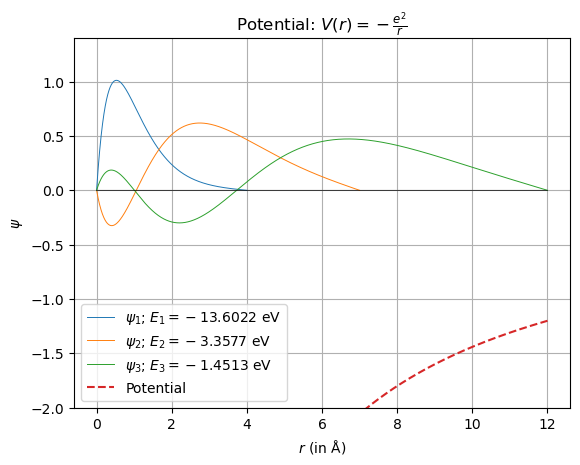

In [26]:
# E0 = 13.6 eV -- is to be calculated
e = 3.795  # rt(eV Å)
hc = 1973   # eV Å
m = 0.511e6  # eV/c2

Ac = 2*m/hc**2
def V(r):
    return -e**2/r
def A(E, r):
    return Ac*(V(r)-E)

def p(r):
    return 0
def q(E, r):
    return A(E, r)
def rfn(r):
    return 0

dr = 1e-3
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 1e-4, 0, [4,7,12], 0

for nodesn in range(3):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-5
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$\psi_{nodesn+1}$; $E_{nodesn+1} = {E:.4f}$ eV',lw=0.7)
plt.xlabel('$r$ (in Å)')
plt.ylabel('$\psi$')
plt.ylim(-2,1.4)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = -\\frac{e^2}{r}$')
plt.grid()
plt.show()

### Question 2
$$ V(r) = -\frac{e^2}{r} \, \exp(-r/a) $$

Given constants,
- $m = 3.795 \, eV/c^2 $
- $\hbar c = 1973 \, eV\, Å $
- $ e = 3.795 \, (eV\, Å)^{1/2} $
- $ a = 3, 5, 7 \, Å $

In [27]:
e = 3.795  # rt(eV Å)
hc = 1973   # eV Å
m = 0.511e6  # eV/c2

Ac = 2*m/hc**2
a = [3, 5, 7]  # in Å

def screened_Coulomb_pot(a):
    def V(r):
        return  -e**2/r * np.exp(-r/a)
    def A(E, r):
        return Ac*(V(r)-E)

    def p(r):
        return 0
    def q(E, r):
        return A(E, r)
    def rfn(r):
        return 0

    dr = 1e-3
    tol = 1e-6
    mxitr = 100
    r0, psi0, rN, psiN = 1e-3, 0, [6,12], 0

    for nodesn in range(2):
        Emn, Emx = V(r0), V(rN[nodesn])
        psi1 = psi0 + (-1)**nodesn *1e-4
        E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                        r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
        if E != None:
            psi = psiNorm(psi, dr)
            r = np.array(r)
            plt.plot(r, psi, label=f'$\psi_{nodesn+1}$; $E_{nodesn+1} = {E:.4f}$ eV',lw=0.7)
    plt.xlabel('$r$ (in Å)')
    plt.ylabel('$\psi$')
    plt.ylim(-1.2,1.2)
    xax = [0 for i in r]
    plt.plot(r,xax,'k', lw=0.5)
    plt.plot(r, V(r), '--', label='Potential')
    plt.legend(loc='best')
    plt.title('Potential: $V(r) = -\\frac{e^2}{r} \, \exp(-r/a)\,;\quad$'+f'a={a}Å')
    plt.grid()
    plt.show()

C:\Users\suman\AppData\Local\Temp\ipykernel_11328\2848319789.py:18: RuntimeWarning: overflow encountered in double_scalars
  if yy[i]*yy[i+1] < 0:


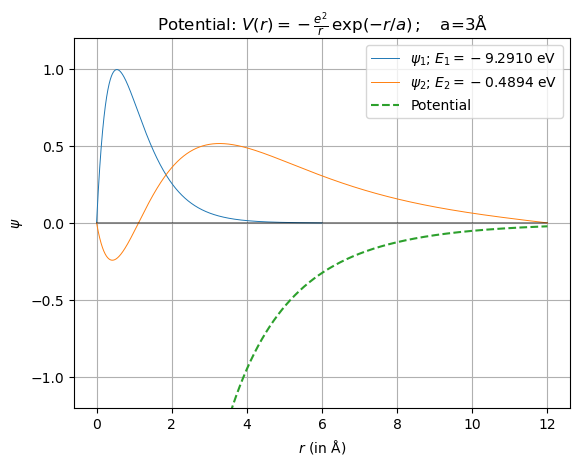

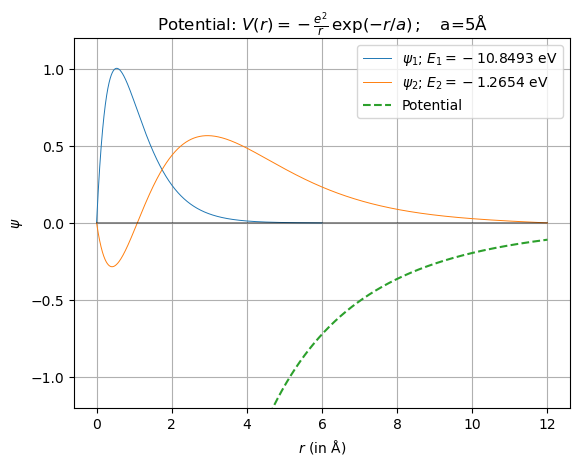

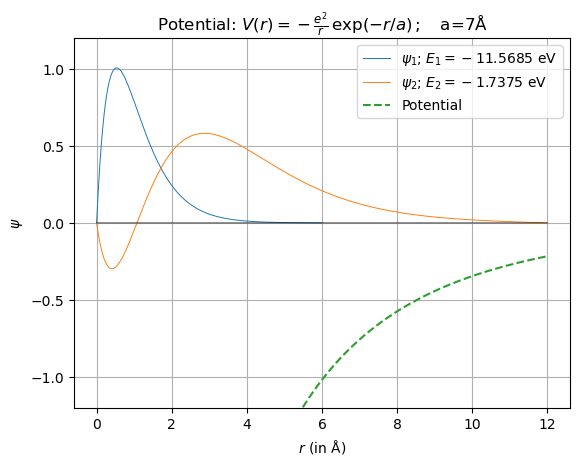

In [28]:
for a1 in range(3):
    screened_Coulomb_pot(a[a1])

### Question 3
$$ V(r) = \frac{1}{2} kr^2 $$

Given constants,
- $m = 940 \,MeV/c^2 $
- $\hbar c = 197.3 \, MeV\,fm $
- $k = 100 \, MeV/fm^2 $

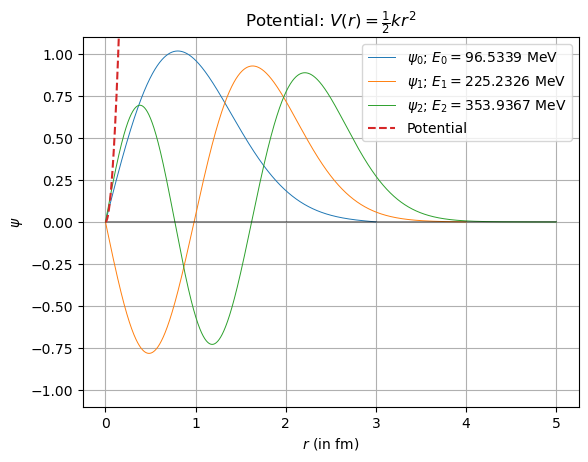

In [29]:
hc = 197.3   # MeV fm
m = 940  # MeV/c2
k = 100  # MeV fm-2

Ac = 2*m/hc**2
def V(r):
    return (1/2)*k*r**2
def A(E, r):
    return Ac*(V(r)-E)

def p(r):
    return 0
def q(E, r):
    return A(E, r)
def rfn(r):
    return 0

dr = 1e-3
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 0, 0, [3,4,5], 0

for nodesn in range(3):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$\psi_{nodesn}$; $E_{nodesn} = {E:.4f}$ MeV',lw=0.7)
plt.xlabel('$r$ (in fm)')
plt.ylabel('$\psi$')
plt.ylim(-1.1,1.1)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = \\frac{1}{2}kr^2$')
plt.grid()
plt.show()

### Question 4
$$ V(r) = \frac{1}{2}kr^2 +\frac{1}{3} br^3 $$

Given constants,
- $m = 940 \,MeV/c^2 $
- $\hbar c = 197.3 \, MeV\,fm $
- $k = 100 \, MeV/fm^2 $
- $ b = 0, 10, 30 \, MeV/fm^3 $

In [30]:
hc = 197.3   # MeV fm
m = 940  # MeV/c2
k = 100  # MeV fm-2
b = [0,10,30] # MeV fm-3

Ac = 2*m/hc**2

def anharmonic_osc(b):
    def V(r):
        return (1/2)*k*r**2 + (1/3)*b*r**3
    def A(E, r):
        return Ac*(V(r)-E)

    def p(r):
        return 0
    def q(E, r):
        return A(E, r)
    def rfn(r):
        return 0

    dr = 1e-3
    tol = 1e-6
    mxitr = 100
    r0, psi0, rN, psiN = 0, 0, [3,4], 0

    for nodesn in range(2):
        Emn, Emx = V(r0), V(rN[nodesn])
        psi1 = psi0 + (-1)**nodesn *1e-4
        E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                        r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
        if E != None:
            psi = psiNorm(psi, dr)
            r = np.array(r)
            plt.plot(r, psi, label=f'$\psi_{nodesn}$; $E_{nodesn} = {E:.4f}$ MeV',lw=0.7)
    plt.xlabel('$r$ (in fm)')
    plt.ylabel('$\psi$')
    plt.ylim(-1.2,1.4)
    xax = [0 for i in r]
    plt.plot(r,xax,'k', lw=0.5)
    plt.plot(r, V(r), '--', label='Potential')
    plt.legend(loc='best')
    plt.title('Potential: $ V(r) = \\frac{1}{2}kr^2 +\\frac{1}{3} br^3 $'
              +f'\nb={b}')
    plt.grid()
    plt.show()

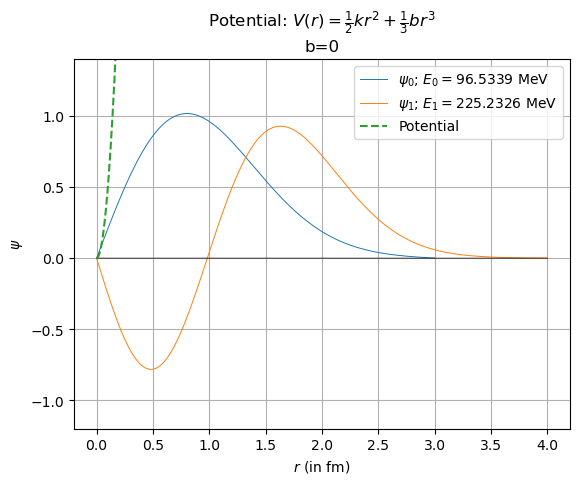

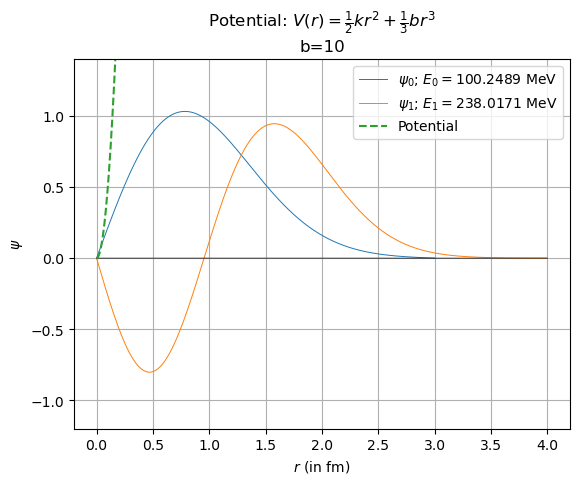

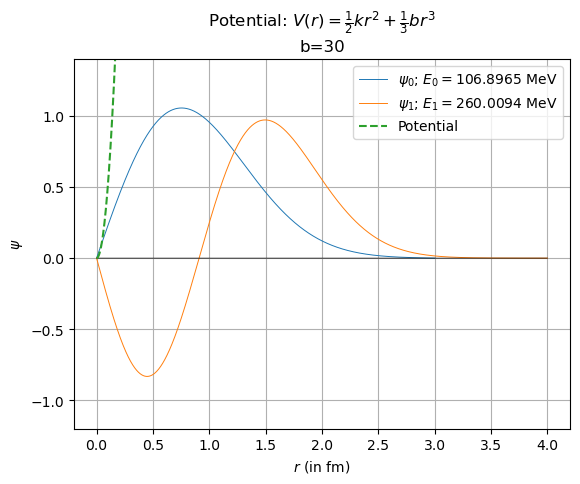

In [31]:
for b1 in range(3):
    anharmonic_osc(b[b1])

### Question 5
$$ V(r) = D(e^{-2\alpha r'} - e^{-\alpha r'})\,;\quad r'=\frac{r-r_0}{r_0} $$

Given constants,
- $m = 940\times 10^6 \, eV/c^2 $
- $\hbar c = 1973 \, eV\, Å $
- $ D = 0.755501 \, eV $
- $ \alpha = 1.44 $
- $ r_0 = 0.131349 \, Å $

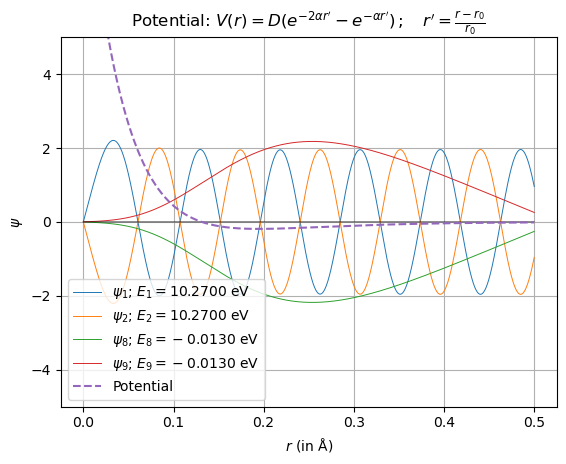

In [32]:
hc = 1973   # eV Å
m = 940e6  # eV/c2
D = 0.755501  # eV
al = 1.44
r_0 = 0.131349  # Å

Ac = 2*m/hc**2
def V(r):
    rp = (r-r_0)/r_0
    return D*(np.exp(-2*al*rp)-np.exp(-al*rp))
def A(E, r):
    return Ac*(V(r)-E)

def p(r):
    return 0
def q(E, r):
    return A(E, r)
def rfn(r):
    return 0

dr = 1e-4
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 0, 0, [0.5,0.5, 0.5,0.5], 0
rNcnt = 0

for nodesn in [0,1,7,8]:
    Emn, Emx = V(r0), V(rN[rNcnt])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[rNcnt], psiN, psi1, dr, nodesn, tol, mxitr)
    rNcnt += 1
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$\psi_{nodesn+1}$; $E_{nodesn+1} = {E:.4f}$ eV',lw=0.7)
plt.xlabel('$r$ (in Å)')
plt.ylabel('$\psi$')
plt.ylim(-5,5)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title("Potential: $ V(r) = D(e^{-2\\alpha r'} - e^{-\\alpha r'}) \,;\quad r'=\\frac{r-r_0}{r_0}$")
plt.grid()
plt.show()